# Lab Assignment 1: Step Test of a First-Order System

This notebook outlines a process for fitting a first-order model of a heater/sensor assembly to data taken during a step test. The learning goals for this notebook are:

* Read and plot a previously saved step test data using the `Pandas` library.
* By inspection, identify the gain and dominant time constant of the step test.
* Simulate the response of a first-order model to step test.
* Through iteration, adjust model parameters to fit the first order model to step test data. 
* Understand the relationship of model parameters to gain and time constant.
* Determine if a first-order model provides an adequate description of the observed response.

## Background and Starter Code

### First-order lumped model for heater/sensor device.

We have previously developed a first-order model for one heater/sensor pair on the temperature control lab device.  An energy balance gives

\begin{align}
C_p\frac{dT_1}{dt} & = U_a(T_{amb} - T_1) + \alpha P_1u_1 \\
\end{align}

where $T_1$ is the average temperature of heater/sensor one, $T_{amb}$ is the ambient temperature of the surroundings. The unknown parameters are the heat capacity $C_p$ and the heat transfer coefficient $U_a$.

The parameters describing the heat input are as follows:

* $\alpha$ is a system calibration constant  The measured value of $\alpha$ is 0.16 milliwatts per unit of $P_1$ per percent.
* $P_1$ is a constant integer value in the range 0 to 255 that controls the operating range of heater 1. It is set using the `tclab` library.
* $u_1$ is a floating point value in the range 0 to 100 that specify the percentage of available power for heater 1.

For example, if $P_1 = 255$ and $u_1 = 100$, then the total applied power is

$$\alpha_1 P_1 u_1 = 0.16 \times 200 \times 50 = 4080\ \text{milliwatts} = 4.08\ \text{watts}$$





### Reading previously saved experimental data

A step test was performed where the temperature control laboratory was initially at steady state at ambient temperature. The heater range $P_1$ was set to 200, then  heater 1 was set to 50% of full range with $\bar{u}_1 = 50$. Temperatures $T_1$ and $T_2$ were recorded for 800 seconds. The has been saved to the course Github repository where it can be located with the url

[https://raw.githubusercontent.com/jckantor/CBE30338-book/main/tclab/data/tclab-data.csv]("https://raw.githubusercontent.com/jckantor/CBE30338-book/main/notebooks/data/step-test-data.csv")

The following cell reads the step test data using the `Pandas` library. The data is stored in a Pandas DataFrame called `data`.

In [1]:
import pandas as pd

# parameter values
P1 = 200
U1 = 50

# file location
github_repo = "https://raw.githubusercontent.com/jckantor/CBE30338-book/main/"
file_path = "tclab/data/tclab-data.csv"
url = github_repo + file_path

# read file
data = pd.read_csv(url, index_col="Time")

# display the step test data
display(data)

,T1,T2,Q1,Q2
Time,,,,
0.00,23.81,23.48,50.0,0.0
1.00,23.81,23.48,50.0,0.0
2.00,23.81,23.48,50.0,0.0
3.00,23.81,23.48,50.0,0.0
4.01,23.81,23.48,50.0,0.0
...,...,...,...,...
796.00,54.75,34.44,50.0,0.0
797.00,54.75,34.44,50.0,0.0
798.01,54.75,34.76,50.0,0.0


Next we plot the data using the `.plot()` method associated with every Pandas DataFrame. The Pandas plot method provides a concise and intuitive means of plotting data.

<AxesSubplot: title={'center': 'P1=200, U1=50'}, xlabel='seconds', ylabel='% of full range'>

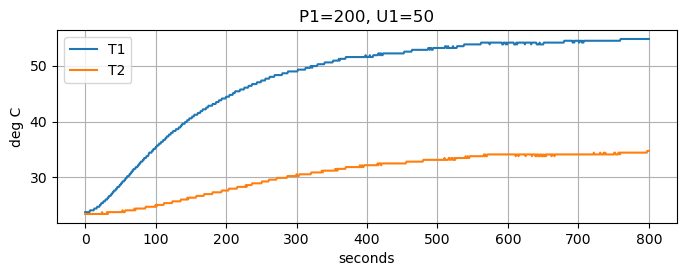

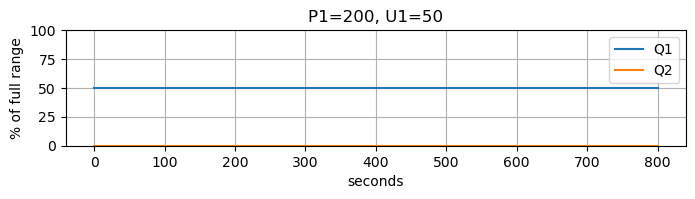

In [2]:
data.plot(y=["T1", "T2"], 
          title=f"{P1=}, {U1=}",
          xlabel="seconds", 
          ylabel="deg C", 
          grid=True, 
          figsize=(8, 2.5)
         )

data.plot(y=["Q1", "Q2"],
          title=f"{P1=}, {U1=}",
          xlabel="seconds", 
          ylabel="% of full range", 
          grid=True, 
          figsize=(8, 1.5),
          ylim=(0, 100)
         )

### Analytical Solution for a Step Test

The goal of this assignment is to fit a first-order model to the step test. The strategy we use will be use an analytical solution for a first-order model subject to a step change in the input. Then, by trail-and-error, find a set of model parameters that provide a good fit to the experimental data.

We start with a first-order model written in gain/time-constant form

$$\tau\frac{dx}{dt} = -x + K \bar{u}$$

where $x = T_1 - T_{amb}$ and the $\bar{u}$ is a constant value for the input $u_1(t)$. The analytical solution consists of two parts

$$x(t) = \underbrace{x_0e^{-t/\tau}}_{\text{initial condition }x_0} + \underbrace{(1 - e^{-t/\tau}) K \bar{u}}_{\text{input }\bar{u}}$$

The solution depends on three parameters:

* $x_0$: initial condition
* $K$: steady-state gain
* $\tau$: time constant

The initial condition $x_0 = 0$ if the step test starts at steady-state. In that case there are two parameters to fit, $K$ and $\tau$. The following cell demonstrates the calculation and plotting of the analytical solution.


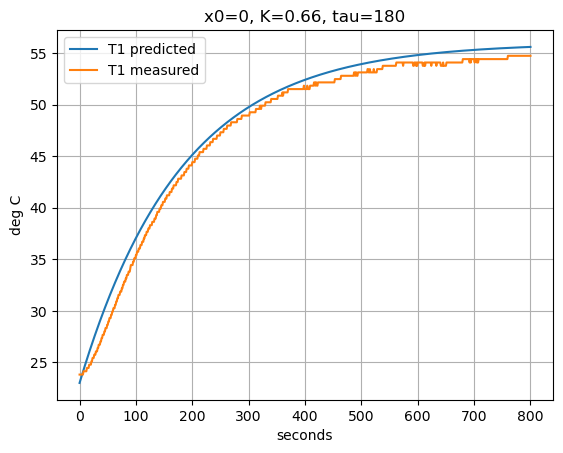

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# estimate parameter values
T_amb = 23
x0 = 0
K = 0.66
tau = 180

# known input
U1 = 50

# compute analytical solution
t = data.index
x = x0*np.exp(-t/tau) + (1 - np.exp(-t/tau))*K*U1

# plotting solution for T1
T1 = x + T_amb
plt.plot(t, T1, t, data["T1"])
plt.legend(["T1 predicted", "T1 measured"])

# dress up the plot
plt.title(f"{x0=}, {K=}, {tau=}")
plt.xlabel("seconds")
plt.ylabel("deg C")
plt.grid(True)


## Lab Assignment

The lab assignment is to conduct a step test of the Temperature Control Lab, and then to fit the results to a first order model of a heater/sensor assembly.

:::{admonition} Task 1.

Create a new Jupyter notebook to document the results of your step test and model fitting experiment. 

* Begin the notebook with an appropriate title, description, and any information that would be required to reproduce the experiment.
* Create a cell to read the data you saved from your step test experiment. Plot the data as outlined above.

* Inspecting the plot for $T_1$, estimate the
    * gain,
    * time constant
    * ambient temperature
    
Write your estimates in a clearly labeled markdown cell.

:::

:::{admonition} Task 2.

Following the starter code presented above, create a new cell to plot an analytical solution for the step response of a first-order model in gain/time constant form. Use your estimates of gain, time constant, initial condition, and the input. On the same plot, overlay a plot of the experimental data. Adjust parameter values until you get the a good fit of the model to the experimental data.

Note that you may need to also adjust values of the ambient temperature and initial condition to fit the model. 

Report

* gain
* time constant
* ambient temperature
* initial condition

:::

:::{admonition} Task 3.

A first-order model in gain/time constant form is given by

$$\tau\frac{dx}{dt} = - x + K u $$

Where $x$ is the state variable. Again letting $x = T_1 - T_{amb}$ and $u = u_1$  Comparing this model of a first order system to the model given up for the heater/sensor assembly.

* Derive expressions for the parameters $\tau$ and $K$ in terms of $C_p$, $U_a$, $\alpha$, and $P_1$. 

* Assume $\alpha = 0.16$ milliwatts per unit of $P1$ per percent. Solve for estimates of $C_p$ and $U_a$. 

:::

:::{admonition} Task 4. 

In a new markdown cell, discuss issues you would face in writing a Python function to automatically fit the model of the heater/sensor assembly to step test data. Your discussion should include the following considerations: 

* How can you measure the quality of fit?
* How should one handle bad measurements? 
* What parameters should be fit?
* How can you estimate uncertainty in the estimates of $C_p$ and $U_a$?
* Is it possible to estimate $U_a$ from a steady state experiment?
* Is is possible to estimate $C_p$ from a steady state experiment?

:::